# 02. Neural network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

Book version of this notebook: - https://www.learnpytorch.io/02_pytorch_classification/


In [1]:
import torch
torch.__version__

'2.1.0+cu118'

# 1. Make classification data and get it ready

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles:
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X: \n{X[:5]}")
print(f"First 5 samples of Y: \n{y[:5]}")

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of Y: 
[1 1 1 1 0]


In [6]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


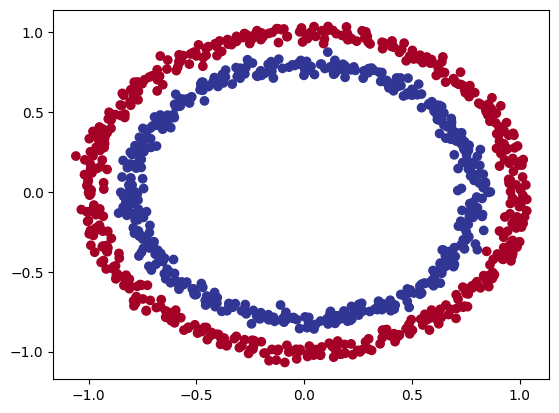

In [7]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

         X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0


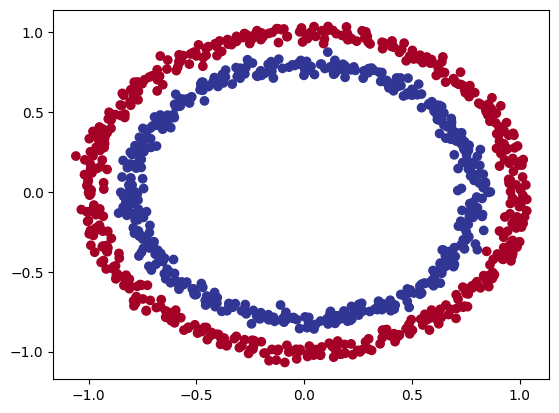

In [8]:
# What actually happened:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

import pandas as pd

circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label":y})
print(circles.head())

import matplotlib.pyplot as plt

plt.scatter(circles.X1, circles.X2, c=circles.label, cmap=plt.cm.RdYlBu)
plt.show()

**Note**: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment on but still practice the fundamentals

# 1.1 Check input and output shapes

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [11]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f'Values for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}')

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [12]:
# y is a scalar so it doesn't have any shape.

### 1.2 Turn data into tensors and create train and test splits

In [13]:
import torch
torch.__version__

'2.1.0+cu118'

In [14]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [15]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
'''You are converting them into float32 because default dtype in torch is float32'''

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [16]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [17]:
# Split data into training and test sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=None)

In [18]:
n_samples

1000

In [19]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model:

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is on.
2. Construct a model (by subclassing `nn.Module`)
3. Define loss function and optimizer
4. Create a trianing and test loop

In [20]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [21]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass (or forward computation of the model)
4. Instantiate an instance of our model class and send it to the target `device`

In [22]:
X_train.shape

torch.Size([800, 2])

In [23]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)
# define a forward() method that outlines the forward pass
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

#4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
next(model_0.parameters()).device

device(type='cpu')

In [25]:
# Let's replicate the model above using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2950,  0.2852],
                      [-0.2685, -0.2641],
                      [ 0.1557,  0.5463],
                      [ 0.0298, -0.5619],
                      [ 0.6626,  0.0231]])),
             ('0.bias', tensor([ 0.6759,  0.1775,  0.3811, -0.6564, -0.5572])),
             ('1.weight',
              tensor([[-0.4313, -0.0251, -0.1853,  0.1123,  0.1540]])),
             ('1.bias', tensor([0.1208]))])

Well, the difference between nn.Sequential and creating a class for a model is in the fact that,
when you are creating a class,you can get as creative as you want with the forward method
but when you are doing it using nn.Sequential you are not going to be able to get creative with
the forward method

In [27]:
# Make predictions:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f'Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}')
print(f'\nFirst 10 labels: \n{y_test[:10]}')

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-1.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.]])

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again.. this is problem specific.

For example for regression you might want MAE(Mean Absolute Error) or MSE(Mean Squarred Error)

For classification you might want Binary Cross Entropy or Categorical Cross Entropy

As a reminder a loss function tells you how wrong your predictions are.

And for optimizers, two of the most common and useful are SGD and ADAM, however, PyTorch has many built-in options

* For the loss function we're going to use `torch.nn.BCEWithLogitsLoss()`, for more on what binary cross entropy (BCE) is, check the internet.
* Check out what logits are
* Check out `torch.optim`

In [28]:
# Setup the loss function:
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone throught the sigmoid activation function prior to the BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

# Calculate accuracy i.e., Evaluation Metric!

Out of 100 examples what percentage does our model get right?


In [29]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train model:

To train our model, we are going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into prediction probabilites by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the argmax().

In [30]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.6736],
        [-0.6683],
        [-0.4661],
        [-0.7333],
        [-0.1145]])

In [31]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [32]:
# Use the sigmoid activation function on our model logits:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3377],
        [0.3389],
        [0.3855],
        [0.3245],
        [0.4714]])

In [33]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` <0.5, `y=0` (class 0)

In [34]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full: ideally, model_0(X_test.to(device))[:5] should be within inference mode
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality:
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension:
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [35]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

## 3.2 Building a training and testing loop

In [36]:
device

'cpu'

In [37]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [38]:
torch.manual_seed(42) # for cpu
torch.cuda.manual_seed(42) # for cuda

# Set the number of epochs
epochs = 100

# Put data to target device:
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  # Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> predicton labels

  # 2. Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), y_train) # nn.BCELoss expects prediction probabilities as input
  loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  # Testing:
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass:
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # print out what's happening:
    if epoch%10 == 0:
      print(f'Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%')

Epoch: 0 | Loss: 0.72018 | Accuracy: 50.00% | Test Loss: 0.71702, Test acc: 50.00%
Epoch: 10 | Loss: 0.71986 | Accuracy: 50.00% | Test Loss: 0.71669, Test acc: 50.00%
Epoch: 20 | Loss: 0.71953 | Accuracy: 50.00% | Test Loss: 0.71637, Test acc: 50.00%
Epoch: 30 | Loss: 0.71922 | Accuracy: 50.00% | Test Loss: 0.71605, Test acc: 50.00%
Epoch: 40 | Loss: 0.71890 | Accuracy: 50.00% | Test Loss: 0.71574, Test acc: 50.00%
Epoch: 50 | Loss: 0.71859 | Accuracy: 50.00% | Test Loss: 0.71543, Test acc: 50.00%
Epoch: 60 | Loss: 0.71829 | Accuracy: 50.00% | Test Loss: 0.71513, Test acc: 50.00%
Epoch: 70 | Loss: 0.71799 | Accuracy: 50.00% | Test Loss: 0.71482, Test acc: 50.00%
Epoch: 80 | Loss: 0.71769 | Accuracy: 50.00% | Test Loss: 0.71453, Test acc: 50.00%
Epoch: 90 | Loss: 0.71740 | Accuracy: 50.00% | Test Loss: 0.71423, Test acc: 50.00%


## 4. Make predictions and evaluate the model:

From the metrics it looks like our model isn't learning anything.

So to inspect it let's make some predictions and make them visual!

In other words visualize visualize visualize!

To do so, we're going to import a helper function called `plot_decision_boundary`
The helper functions are in: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

Check out: https://madewithml.com/
Really worth it!


In [39]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


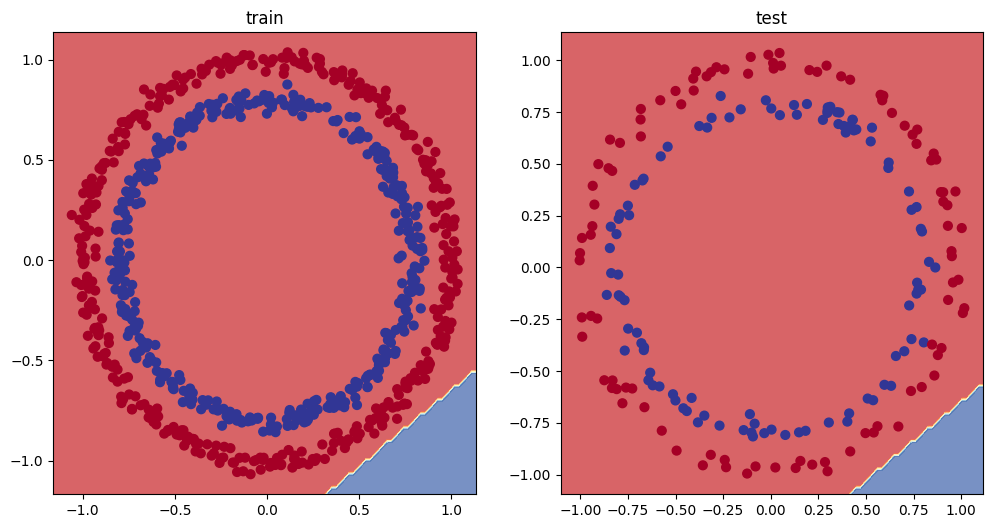

In [40]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden unites to 10 hidden units
* Fit for longer (increase the number of epochs)
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred to as **hyperparameters**

![image.png](
  
)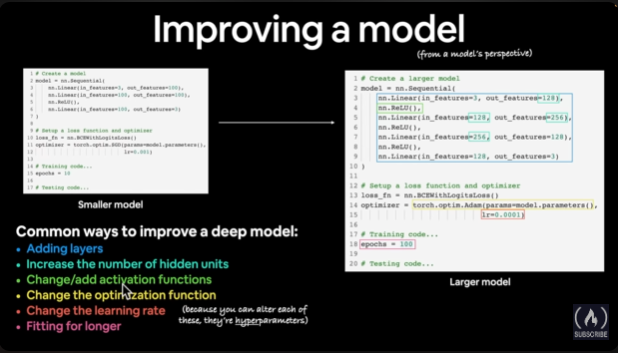

Let's try and import our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

But don't do all three in one step.
You want to change one value at a time and track the results.
That's called Experiment Tracking

In [41]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.layer_2(self.layer_1(x))) # this is faster
    ### or you could do this:
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z

In [42]:
  model_1 = CircleModelV1().to(device)
  model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [43]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [44]:
loss_fn = nn.BCEWithLogitsLoss()
# Create new optimizer:
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.001)

In [45]:
# make our training loop as reproducable as possible
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ## Testing:
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_true=y_test,
                        y_pred=test_pred)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss} | Acc: {acc:.2f}% | Test loss: {test_loss: .5f} | Test acc: {test_acc: .2f}%')

Epoch: 0 | Loss: 0.6939550638198853 | Acc: 50.00% | Test loss:  0.69261 | Test acc:  50.00%
Epoch: 100 | Loss: 0.6939223408699036 | Acc: 50.00% | Test loss:  0.69261 | Test acc:  50.00%
Epoch: 200 | Loss: 0.6938912868499756 | Acc: 50.00% | Test loss:  0.69262 | Test acc:  50.00%
Epoch: 300 | Loss: 0.6938619017601013 | Acc: 50.00% | Test loss:  0.69263 | Test acc:  50.00%
Epoch: 400 | Loss: 0.6938338279724121 | Acc: 50.00% | Test loss:  0.69263 | Test acc:  50.00%
Epoch: 500 | Loss: 0.6938072443008423 | Acc: 50.00% | Test loss:  0.69264 | Test acc:  50.00%
Epoch: 600 | Loss: 0.6937817931175232 | Acc: 50.00% | Test loss:  0.69265 | Test acc:  50.00%
Epoch: 700 | Loss: 0.6937574744224548 | Acc: 50.00% | Test loss:  0.69266 | Test acc:  50.00%
Epoch: 800 | Loss: 0.6937341094017029 | Acc: 50.00% | Test loss:  0.69267 | Test acc:  50.00%
Epoch: 900 | Loss: 0.6937117576599121 | Acc: 50.00% | Test loss:  0.69268 | Test acc:  50.00%


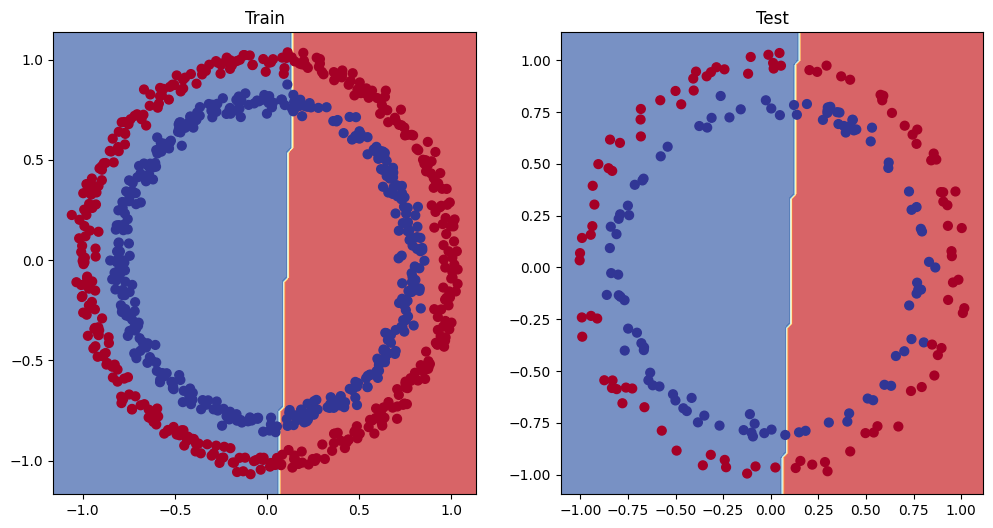

In [46]:
# Plot the decision boundary:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line:

One way to troubleshoot a larger problem is to test out a smaller problem

In [47]:
# Create some data (same as notebook 01)
weight = torch.rand(1).item()
bias = torch.rand(1).item()

X_regression = torch.arange(0,1,0.01).unsqueeze(dim=1)
y_regression = weight*X_regression + bias # Linear Regression Formula without epsilon

# Check the data:
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.9150],
         [0.9238],
         [0.9326],
         [0.9415],
         [0.9503]]))

In [48]:
# Create train and test splits:
from sklearn.model_selection import train_test_split

X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression,
                                                                                        y_regression,
                                                                                        test_size = 0.2,
                                                                                        shuffle = True,
                                                                                        stratify = None,
                                                                                        random_state=42)



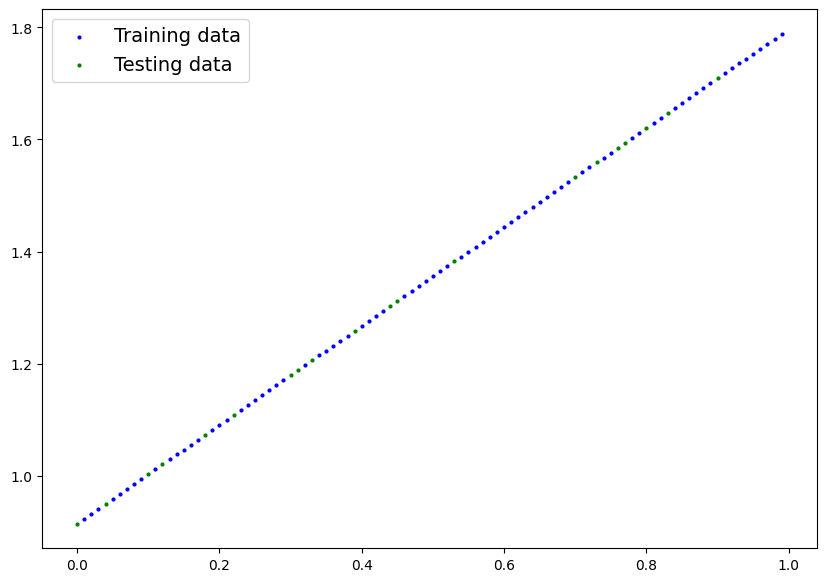

In [49]:
plot_predictions(train_data = X_train_regression, train_labels = y_train_regression,
                 test_data = X_test_regression, test_labels = y_test_regression)

In [50]:
X_train_regression[:10], y_train_regression[:10], X_train_regression.shape, y_train_regression.shape

(tensor([[0.5500],
         [0.8800],
         [0.2600],
         [0.4200],
         [0.6900],
         [0.1500],
         [0.4000],
         [0.9600],
         [0.0900],
         [0.7200]]),
 tensor([[1.4003],
         [1.6914],
         [1.1444],
         [1.2856],
         [1.5238],
         [1.0473],
         [1.2679],
         [1.7620],
         [0.9944],
         [1.5502]]),
 torch.Size([80, 1]),
 torch.Size([80, 1]))

In [51]:
### 5.2 Adjusting `model_1` to fit a straight line:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=1),
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Linear(in_features=1, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [52]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr = 0.001)

In [53]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000

X_train_regression, y_train_regression, X_test_regression, y_test_regression = X_train_regression.to(device), y_train_regression.to(device), X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  model_2.train()
  preds = model_2(X_train_regression)
  loss = loss_fn(preds, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 1.4418113231658936 | Test loss: 1.3742555379867554
Epoch: 100 | Loss: 1.0484508275985718 | Test loss: 0.9795236587524414
Epoch: 200 | Loss: 0.558952808380127 | Test loss: 0.488616943359375
Epoch: 300 | Loss: 0.2767612040042877 | Test loss: 0.25075116753578186
Epoch: 400 | Loss: 0.23987571895122528 | Test loss: 0.2456730604171753
Epoch: 500 | Loss: 0.2298233062028885 | Test loss: 0.24143096804618835
Epoch: 600 | Loss: 0.2212543487548828 | Test loss: 0.23277628421783447
Epoch: 700 | Loss: 0.21297216415405273 | Test loss: 0.22406096756458282
Epoch: 800 | Loss: 0.2048780918121338 | Test loss: 0.21578606963157654
Epoch: 900 | Loss: 0.1968948394060135 | Test loss: 0.20804116129875183


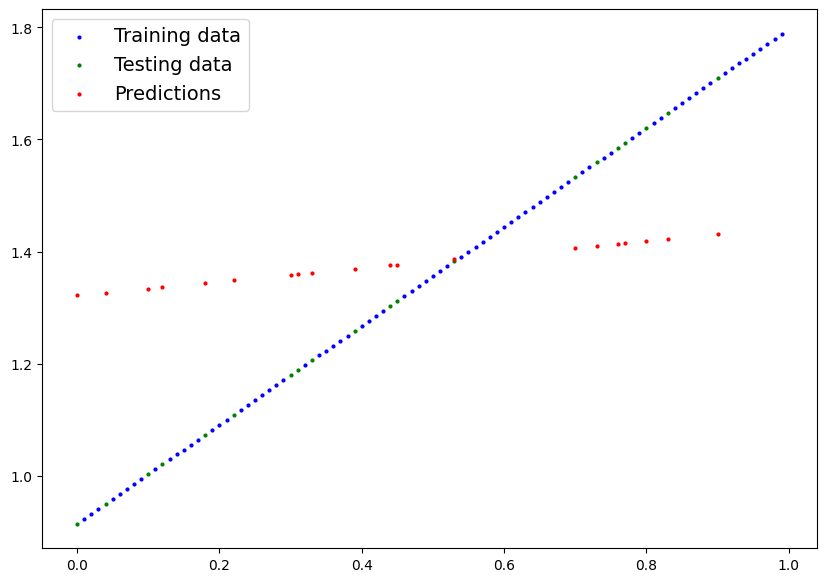

In [54]:
model_2.eval()
with torch.inference_mode():
  test_pred_regression = model_2(X_test_regression)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                 predictions=test_pred_regression.cpu())

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of straight and non-straight lines?"

or, in machine learning terms, an infinite amount of linear and non-linear functions!

### 6.1 Recreating non-linear data (red and blue circles)

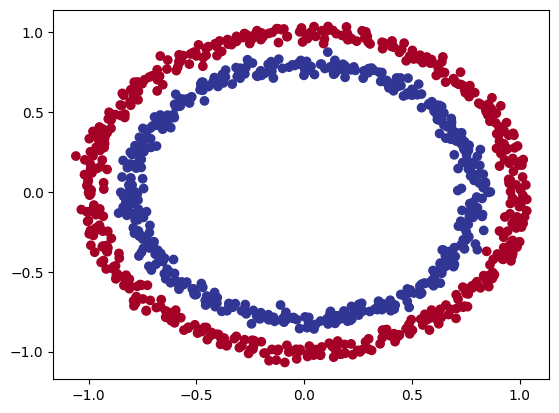

In [55]:
# make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [56]:
# Convert data to tensors and then to train and test splits:
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

# Split:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42,
                                                    stratify=None)


### 6.2 Building a model with non-linear activations:
* Linear = Straight linear
* Non-linear = non straight line

Artificial neural netowrks are a large combination of linear and non linear functions which are able to find patterns in data

In [58]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function
    # self.sigmoid = nn.Sigmoid() # Another way to have activation
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # Where to put non-linear activation function? A: Between each of our layers
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)

In [65]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### 6.3 Training a model with Non-linearity

In [66]:
model_0.state_dict() # notice relu activation function doesn't have any parameters to optimize!

OrderedDict([('0.weight',
              tensor([[-0.2942,  0.2839],
                      [-0.2684, -0.2642],
                      [ 0.1561,  0.5457],
                      [ 0.0296, -0.5615],
                      [ 0.6623,  0.0235]])),
             ('0.bias', tensor([ 0.6718,  0.1773,  0.3794, -0.6554, -0.5558])),
             ('1.weight',
              tensor([[-0.4235, -0.0238, -0.1804,  0.1044,  0.1475]])),
             ('1.bias', tensor([0.1302]))])

In [68]:
# Random seeds:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss takes in logits as first input
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    # # Check the shape of test_logits and y_test:
    # print(test_logits.shape, y_test.shape)
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .4f} | Acc: {acc: .2f}% | Test Loss: {test_loss: .4f} | Test Acc: {test_acc: .2f}%")

Epoch: 0 | Loss:  0.4814 | Acc:  93.50% | Test Loss:  0.4992 | Test Acc:  0.00%
Epoch: 100 | Loss:  0.3704 | Acc:  97.75% | Test Loss:  0.4058 | Test Acc:  0.00%
Epoch: 200 | Loss:  0.2544 | Acc:  99.00% | Test Loss:  0.3031 | Test Acc:  0.00%
Epoch: 300 | Loss:  0.1717 | Acc:  99.50% | Test Loss:  0.2210 | Test Acc:  0.00%
Epoch: 400 | Loss:  0.1218 | Acc:  99.62% | Test Loss:  0.1650 | Test Acc:  0.00%
Epoch: 500 | Loss:  0.0912 | Acc:  99.88% | Test Loss:  0.1274 | Test Acc:  0.00%
Epoch: 600 | Loss:  0.0710 | Acc:  99.88% | Test Loss:  0.1032 | Test Acc:  0.00%
Epoch: 700 | Loss:  0.0577 | Acc:  99.88% | Test Loss:  0.0867 | Test Acc:  0.00%
Epoch: 800 | Loss:  0.0485 | Acc:  99.88% | Test Loss:  0.0747 | Test Acc:  0.00%
Epoch: 900 | Loss:  0.0418 | Acc:  99.88% | Test Loss:  0.0658 | Test Acc:  0.00%


## 6.4 Evaluating a model trained with non-linear activation functions

In [71]:
# Model predictions:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

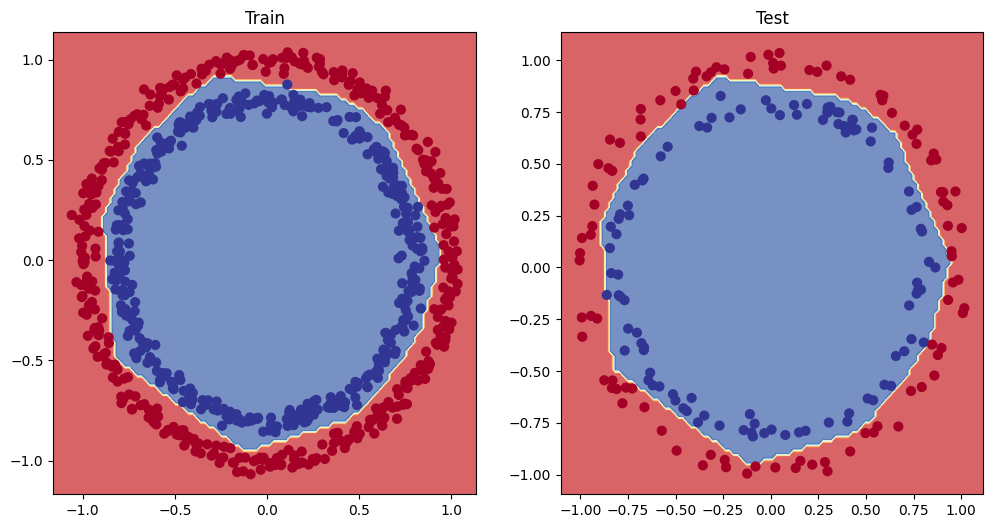

In [69]:
# Plot the decision boundary:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replication of non-linear activation functions

Neural networks rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own

And these tools are linear and non-linear functions

In [75]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

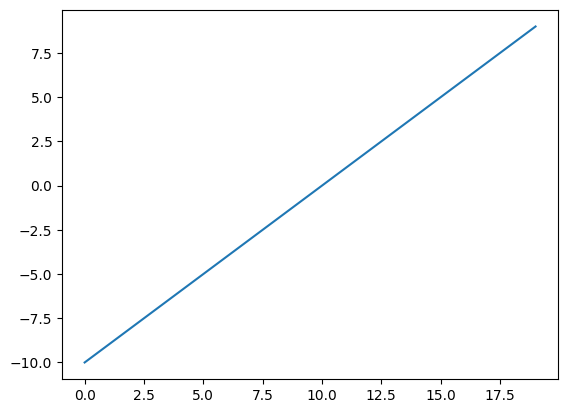

In [76]:
plt.plot(A)

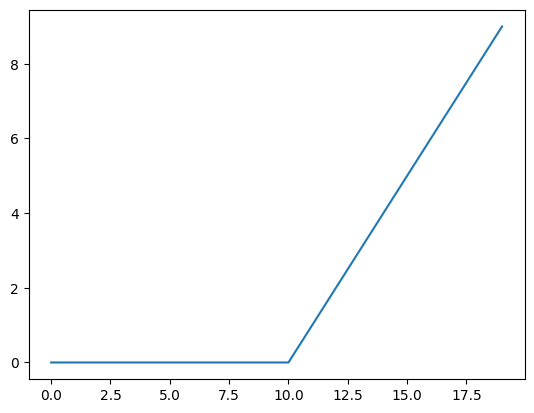

In [79]:
# Plot relu function:
plt.plot(torch.relu(A))

In [80]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

In [81]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

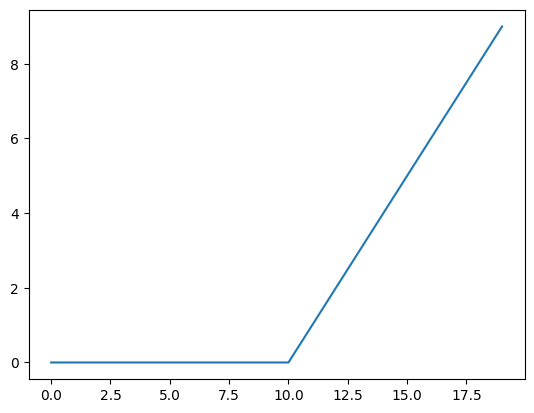

In [82]:
plt.plot(relu(A))

In [83]:
# Now let's do the same for sigmoid:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1/(1 + torch.exp(-x))

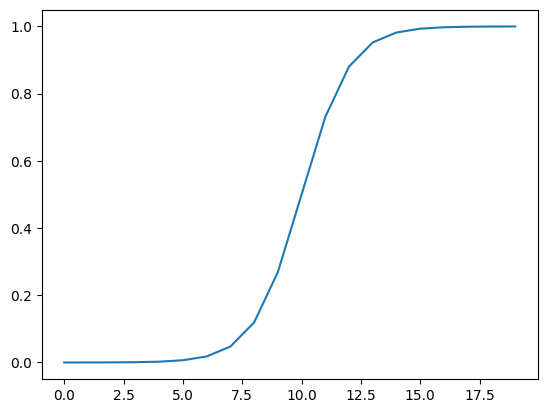

In [84]:
plt.plot(torch.sigmoid(A))

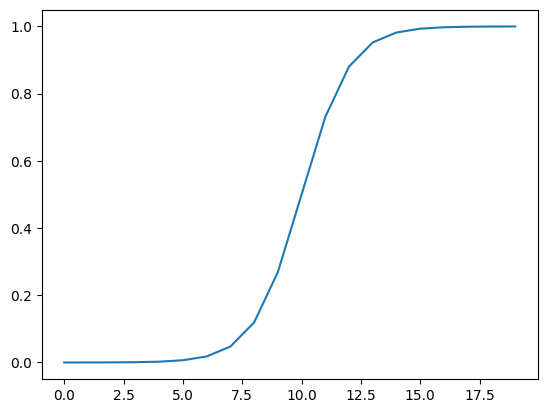

In [85]:
plt.plot(sigmoid(A))